# Lead Scoring Case Study

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 


There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# 1. Importing Necessary Libraries

In [3]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np

# Importing Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Other Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve


In [4]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Improving the HTML display 
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Reading and Understanding(Inspecting the dataframe)

In [5]:
## Importing the dataset
lead_data=pd.read_csv("Leads.csv")

# Setting pandas options
pd.set_option('display.max_columns',None)
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
# Let's check the dimension of the dataframe
lead_data.shape

(9240, 37)

In [7]:
# let's look at the statistical aspect of the dataframe
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# Let's check the datatype of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Checking duplicates in the dataframe
lead_data.duplicated().sum()

0

# Data Cleaning

In [10]:
#Let's check the null values in the datas
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Observation:

From the dataset, we observed the following things.
- There are many columns present having high number of null values which can be dropped.
- Prospect ID and Lead Number both are unique identifiers which are used for the same purpose. We can drop any one (Prospect ID can be dropped) 
- Few categorical columns are there having "select" as an entry. Those columns can be dropped as they are essentially null values here because
  "select" appears when someone doesn't select anything from drop down.


## Drop Prospect ID column

In [11]:
lead_data.drop("Prospect ID", axis=1, inplace =True)
lead_data.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization How did you hear about X Education  \
0                   Select                             Select   
1                   Select                             Select   
2  Business Administration                             Select   
3    Media and Advertising                      Word Of Mouth   
4                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0

## Replace "Select" categories:

In [12]:
# Select all non-numeric columns

lead_data_obj= lead_data.select_dtypes(include='object')



# Find out columns that have "Select"

s= lambda x: x.str.contains('Select', na=False)
l= lead_data_obj.columns[lead_data_obj.apply(s).any()].tolist()
print(l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


We found there are 4 columns that contains "Select", which are effectively null values.So we will replace them with NaN.

In [13]:
# Select all the columns that have a "Select" entry
select_cols=['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# Replacing "Select" values with NaN
lead_data[select_cols] = lead_data[select_cols].replace('Select',np.NaN)

### Handle null values and sales generated columns:

- We have observed that there are a number of columns having high number of null entries.For them, let's calculate the percentage of null values and
  then will take a decision.
- Again, we can also drop sales generated columns as these data entries are made by the sales team after connecting with the student and they are of
  no use for building our model. Those respective columns are:
                 -Tags
                 -Lead Quality
                 -All asymmetrique Columns
                 -Last Activity
                 -Last Notable Activity

In [14]:
#Calculate percentage of null values for each column
(lead_data.isnull().sum()/lead_data.shape[0]) * 100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### Observation:
It can be seen that there are a few columns with higher number of missing data. We cannot get back those data from any reliable sources, so it is better to drop all those columns with missing values > 40%.

In [15]:
## Dropping columns with null values > 40% or Sales generated columns
lead_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags',
                'Last Activity','Last Notable Activity'], axis=1, inplace=True)

lead_data.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit Country           Specialization  \
0                   0.0     NaN                      NaN   
1                   2.5   India                      NaN   
2                   2.0   India  Business Administration   
3                   1.0   India    Media and Advertising   
4                   1.0   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

In [16]:
# Rechecking the percentage of null values for each column
(lead_data.isnull().sum()/lead_data.shape[0])*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

## Observations:
It has been observed that there are still five columns with high null values as:'Country','Specialization','What is your current occupation',         
'What matters most to you in choosing a course', and 'City'.

Let's check them individually and take a decision on it.

### Country Column

In [17]:
lead_data.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

### Observation:
 The distribution of data is heavily skewed, with India + NaN(null values) = 97% of the total.
 It is safe to drop this column.

In [18]:
lead_data.drop("Country", axis = 1, inplace = True)

## Renaming few columns

In [19]:
## Renaming the columns:
lead_data.rename(columns={'What matters most to you in choosing a course': 'reason_for_course_selection','What is your current occupation':'occupation','Lead Origin':'Lead_origin','Lead Source':'Lead_source',
                          'Lead Number':'Lead_number','Page Views Per Visit':'Page_Views_Visit','Total Time Spent on Website':'Time_on_website'},inplace = True)
lead_data.head()

Lead_number              Lead_origin     Lead_source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Time_on_website  Page_Views_Visit  \
0          No          0          0.0                0               0.0   
1          No          0          5.0              674               2.5   
2          No          1          2.0             1532               2.0   
3          No          0          1.0              305               1.0   
4          No          1          2.0             1428               1.0   

            Specialization  occupation reason_for_course_selection Search  \
0                      NaN  Unemployed     Better Career Prospects     No   
1                      NaN  Unemployed     Better Career Prospects     No   
2  Business Administration     Student     Better Career Prospects     No   
3    Media and Advertising  Unemployed     Better Career Prospects     No   
4                      NaN  Unemployed     Better Career Prospects     No   

  Magazine Newspaper Article X Education Forums Newspaper  \
0       No                No                 No        No   
1       No                No                 No        No   
2       No                No                 No        No   
3       No                No                 No        No   
4       No                No                 No        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

## reason_for_course_selection column:

In [20]:
## Calculating the value counts of the column
lead_data.reason_for_course_selection.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: reason_for_course_selection, dtype: float64

### Observation:
Here the distribution of data is also heavily skewed, with Better Career Prospects + NaN(null values) = approx 100 % of the total. It is also safe to drop this column.       

In [21]:
lead_data.drop("reason_for_course_selection", axis =1, inplace = True)

## occupation column:

In [22]:
## Calculating the value counts of the column
lead_data.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: occupation, dtype: float64

Observation:

For occupation, we can combine the categories, and then impute them proportionally to maintain the distribution and not to introduce bias.

In [23]:
## Combining low representing categories
lead_data.loc[(lead_data.occupation=='Student') | (lead_data.occupation=='Other') | (lead_data.occupation=='Housewife') | 
              (lead_data.occupation=='Businessman') , 'occupation'] = 'Student and Others'

In [24]:
## Re-Calculating the value counts of the column
lead_data.occupation.value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [25]:
## impute proportionately
lead_data['occupation'] = lead_data.occupation.fillna(pd.Series(np.random.choice(['Unemployed','Working Professional','Student and Others'],
                                                                                 p=[0.8550,0.1078,0.0372],size=len(lead_data))))

## Specialization column 

In [26]:
## Calculating the value counts of the column
lead_data.Specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

Observation:

For Specialization, we can first combine the categories based on the course type, and then impute them proportionally to maintain the distribution and not to introduce bias.

In [27]:
# Categorize all management courses
lead_data.loc[(lead_data.Specialization=='Finance Management') | (lead_data.Specialization=='Human Resource Management') | 
              (lead_data.Specialization=='Marketing Management') | (lead_data.Specialization=='Operations Management') | 
              (lead_data.Specialization=='IT Projects Management') | (lead_data.Specialization=='Supply Chain Management') | 
              (lead_data.Specialization=='Healthcare Management') | (lead_data.Specialization=='Hospitality Management') | 
             (lead_data.Specialization=='Retail Management'),'Specialization'] = 'Management Specializations'

# Categorize all business courses
lead_data.loc[(lead_data.Specialization=='Business Administration') | (lead_data.Specialization=='International Business') | 
              (lead_data.Specialization=='Rural and Agribusiness') | (lead_data.Specialization=='E-Business'),'Specialization']= 'Business Specializations'


# categorize all industry courses
lead_data.loc[(lead_data.Specialization=='Banking, Investment And Insurance') | (lead_data.Specialization=='Travel and Tourism') | 
              (lead_data.Specialization=='Media and Advertising') | (lead_data.Specialization=='E-COMMERCE') | 
              (lead_data.Specialization=='Services Excellence'),'Specialization'] = 'Industry Specializations'

In [28]:
## Re-Calculating the value counts of the column
lead_data.Specialization.value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: Specialization, dtype: float64

In [29]:
# impute proprtionately
lead_data['Specialization'] = lead_data.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations','Industry Specializations',
                                                                                          'Business Specializations'],p=[0.7258,0.1529,0.1213],size=len(lead_data))))

## City Column:

In [30]:
## Calculating the value counts of the column
lead_data.City.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

Observation:

We will categorize Cities based on logical decisions and impute proportionately

In [31]:
# Categorize all non-Mumbai but Maharashtra cities 
lead_data.loc[(lead_data.City=='Thane & Outskirts') | (lead_data.City=='Other Cities of Maharashtra'),'City']='Non-Mumbai Maharashtra Cities'

# Categorize all other cities
lead_data.loc[(lead_data.City=='Other Cities') | (lead_data.City=='Other Metro Cities') | (lead_data.City=='Tier II Cities'),'City']= 'Non-Maharashtra Cities'

In [32]:
## Re-Calculating the value counts of the column
lead_data.City.value_counts(normalize = True) * 100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: City, dtype: float64

In [33]:
## impute proportionately
lead_data['City']= lead_data.City.fillna(pd.Series(np.random.choice(['Mumbai','Non-Mumbai Maharashtra Cities','Non-Maharashtra Cities'],p=[0.5784,0.2170,0.2046],size=len(lead_data))))

## Handle categorical columns with low number of missing values and low representation of categories
 In this step, we will check the rest of the categorical columns one by one and
- Merge categories that have low representation
- Impute the missing values

In [34]:
(lead_data.isnull().sum()/lead_data.shape[0]) * 100

Lead_number                                 0.000000
Lead_origin                                 0.000000
Lead_source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Time_on_website                             0.000000
Page_Views_Visit                            1.482684
Specialization                              0.000000
occupation                                  0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [35]:
# determine unique values for all object datatype columns

for k,v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead_origin = 5
Lead_source = 21
Do Not Email = 2
Do Not Call = 2
Specialization = 3
occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2


### Observation:
It has been observed that the categorical columns in which the number of unique values > 3 are:

-Lead_origin

-Lead_source

### Lead_origin Column

In [36]:
## Calculating the value counts of the column

lead_data.Lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead_origin, dtype: float64

In [37]:
# There are a lot of smaller values which will not be used as definitive factors, we will group them together
lead_data.loc[(lead_data.Lead_origin=='Lead Add Form') | (lead_data.Lead_origin=='Lead Import') | 
              (lead_data.Lead_origin=='Quick Add Form'),'Lead_origin']='Lead Add Form and others'

### Lead_source column

In [38]:
## Calculating the value counts of the column

lead_data.Lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead_source, dtype: float64

In [39]:
# Let's impute the missing values with the mode of the data which is clearly "Google"
lead_data.Lead_source.fillna(lead_data.Lead_source.mode()[0], inplace = True)

In [40]:
# Here also there are a lot of smaller values which will not be used as definitive factors, we will group them together

lead_data.loc[(lead_data.Lead_source=='Welingak Website') | (lead_data.Lead_source=='Referral Sites') | (lead_data.Lead_source=='Facebook') | 
              (lead_data.Lead_source=='NaN') | (lead_data.Lead_source=='bing') | (lead_data.Lead_source=='google') | (lead_data.Lead_source=='Click2call') | 
              (lead_data.Lead_source=='Press_Release') | (lead_data.Lead_source=='Social Media') | (lead_data.Lead_source=='Live Chat') | 
              (lead_data.Lead_source=='youtubechannel') | (lead_data.Lead_source=='testone') | (lead_data.Lead_source=='Pay per Click Ads') | 
              (lead_data.Lead_source=='welearnblog_Home') | (lead_data.Lead_source=='WeLearn') | (lead_data.Lead_source=='blog') | 
              (lead_data.Lead_source=='NC_EDM'),'Lead_source']='Other Social Sites'            

### Handle Binary Columns

  -Drop those columns that have significant data imbalance
  
  -Drop all those columns that have only 1 unique entry

In [41]:
# determine unique values
for k,v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead_origin = 3
Lead_source = 6
Do Not Email = 2
Do Not Call = 2
Specialization = 3
occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2


### Observation:
The following columns can be dropped as they have only 1 unique value:
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque 

### Checking the data imbalance for the remaining columns

In [42]:
# Select the remaining binary columns in a new dataframe
lead_data_binary= lead_data[['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                             'Through Recommendations','A free copy of Mastering The Interview']]

# Checking the value counts for each of the columns
for i in lead_data_binary.columns:
    x = (lead_data_binary[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64



### Observations:
Because of heavy data imbalance , the following columns can be dropped as well
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations


In [43]:
drop_bin = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Magazine',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

lead_data.drop(drop_bin, axis = 1, inplace = True)

## Handle Numerical Columns

### 1. Changing the datatype of Lead Number column

Lead Number column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object datatype

In [44]:
lead_data.Lead_number = lead_data.Lead_number.astype('object')

### 2. Handelling TotalVisits column

We need to handle the missing values of this column and then can convert the datatype to integer since visits can't be decimal.

In [45]:
lead_data.TotalVisits.fillna(lead_data.TotalVisits.median(), inplace = True)
lead_data.TotalVisits = lead_data.TotalVisits.astype('int')

### 3. Handelling Page_Views_Visit column

In [46]:
lead_data.Page_Views_Visit.fillna(lead_data.Page_Views_Visit.median(), inplace = True)

In [47]:
## Re-checking the dataframe
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead_number                             9240 non-null   object 
 1   Lead_origin                             9240 non-null   object 
 2   Lead_source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int32  
 6   Time_on_website                         9240 non-null   int64  
 7   Page_Views_Visit                        9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   occupation                              9240 non-null   object 
 10  City                                    9240 non-null   obje

# Exploratory Data Analysis

## Numerical columns

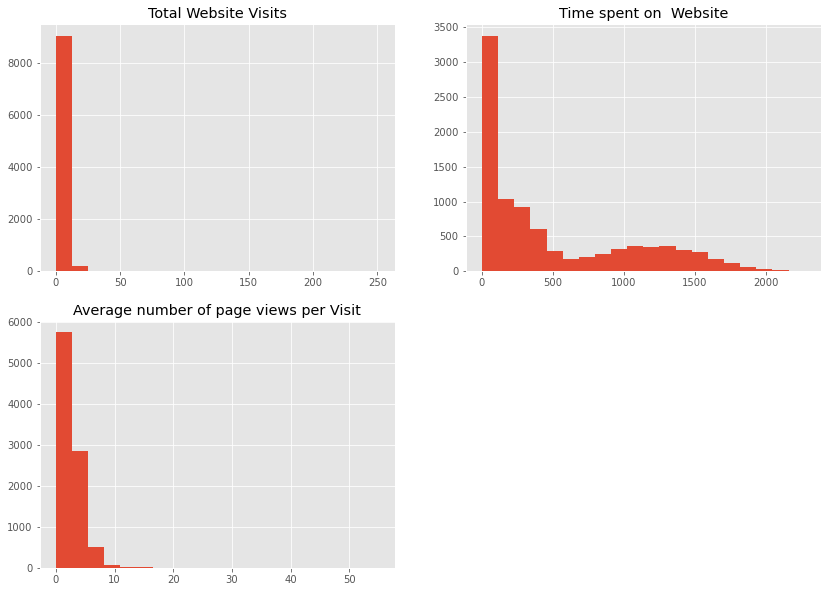

In [48]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
plt.hist(lead_data.TotalVisits, bins = 20)
plt.title('Total Website Visits')

plt.subplot(2,2,2)
plt.hist(lead_data.Time_on_website, bins = 20)
plt.title('Time spent on  Website')

plt.subplot(2,2,3)
plt.hist(lead_data.Page_Views_Visit, bins = 20)
plt.title('Average number of page views per Visit')

plt.show()




### Observations:
- There might be a possibility of outliers as there are high peaks and skewed data. We will check them later.

### Heatmap

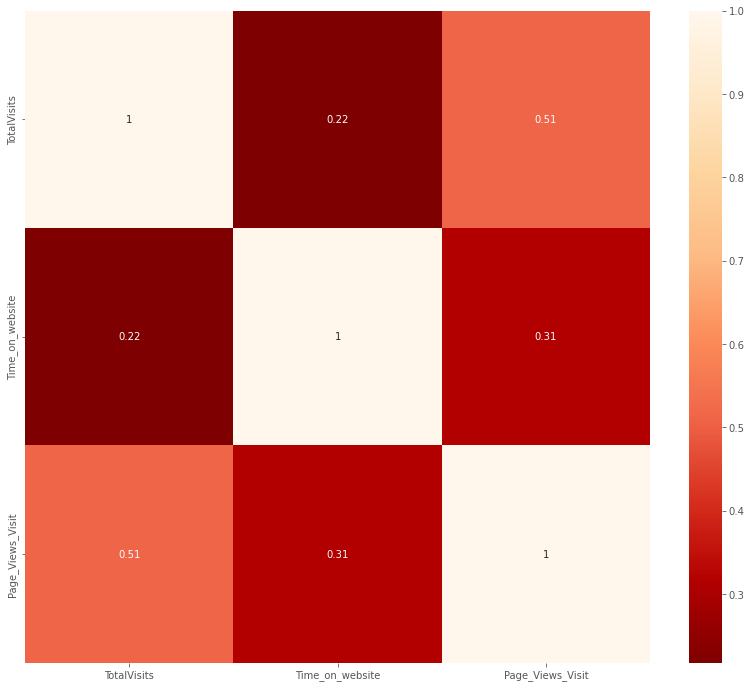

In [49]:
plt.figure(figsize = (14,12))
sns.heatmap(lead_data[['TotalVisits','Time_on_website','Page_Views_Visit']].corr(),cmap="OrRd_r",annot = True)
plt.show()

### Observation:
No significant correlation is observed.

## Checking the outliers

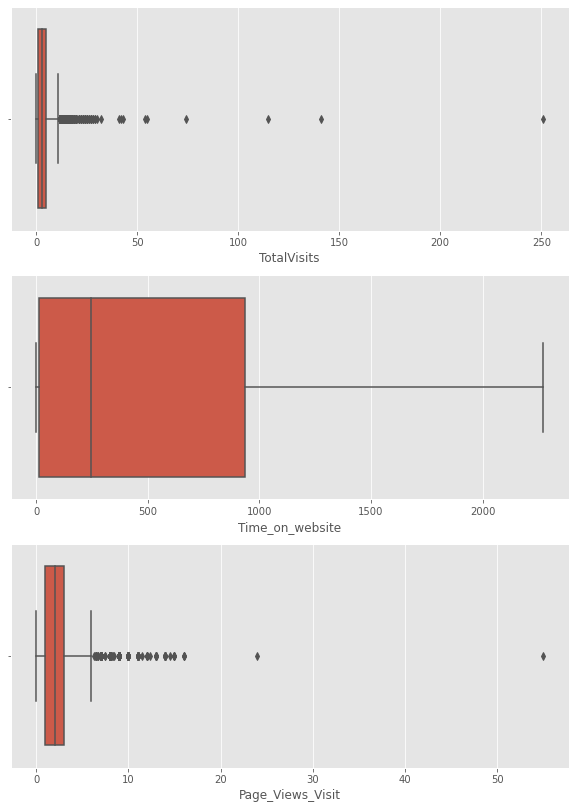

In [50]:
plt.figure(figsize = (10,14))

plt.subplot(3,1,1)
sns.boxplot(lead_data.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(lead_data.Time_on_website)

plt.subplot(3,1,3)
sns.boxplot(lead_data.Page_Views_Visit)

plt.show()

### Observations:
- It can be observed from the box plots and the statistics,there are upper bound outliers in both TotalVisits and Page_Views_Visit
  columns.
- It is also observed that the data can be capped at 99 percentile.

## Categorical columns

1. Lead_origin

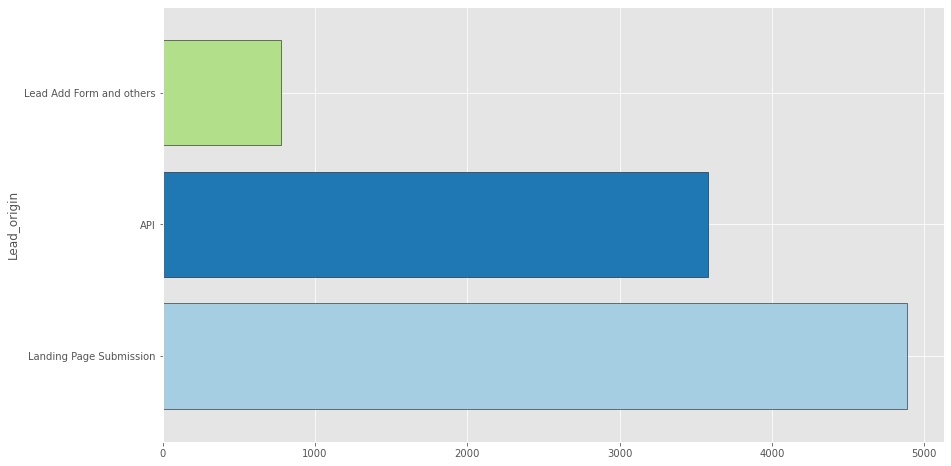

In [51]:
plt.figure(figsize = (14,8))
lead_data.groupby('Lead_origin')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

In [52]:
lead_data.head()

Lead_number              Lead_origin     Lead_source Do Not Email  \
0      660737                      API      Olark Chat           No   
1      660728                      API  Organic Search           No   
2      660727  Landing Page Submission  Direct Traffic           No   
3      660719  Landing Page Submission  Direct Traffic           No   
4      660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Time_on_website  Page_Views_Visit  \
0          0            0                0               0.0   
1          0            5              674               2.5   
2          1            2             1532               2.0   
3          0            1              305               1.0   
4          1            2             1428               1.0   

               Specialization          occupation  \
0  Management Specializations          Unemployed   
1  Management Specializations          Unemployed   
2    Business Specializations  Student and Others   
3    Industry Specializations          Unemployed   
4  Management Specializations          Unemployed   

                            City A free copy of Mastering The Interview  
0  Non-Mumbai Maharashtra Cities                                     No  
1                         Mumbai                                     No  
2                         Mumbai                                    Yes  
3                         Mumbai                                     No  
4                         Mumbai                                     No

### Lead_source

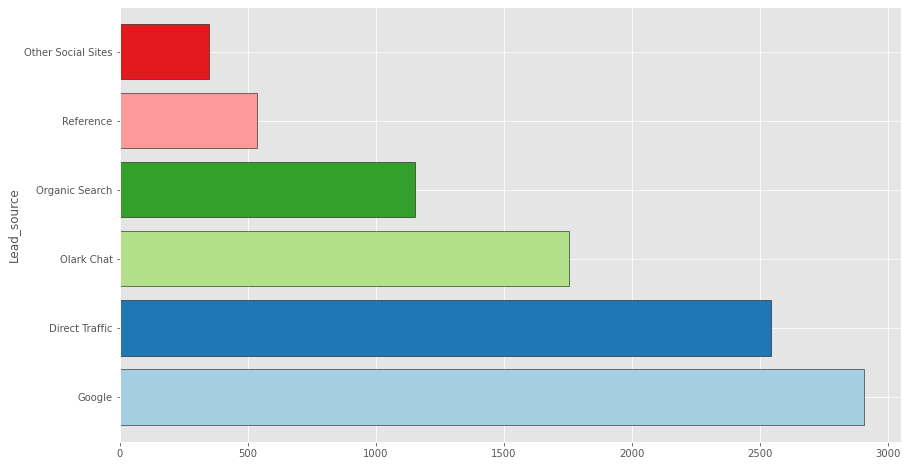

In [53]:
plt.figure(figsize = (14,8))
lead_data.groupby('Lead_source')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

- Most of the source of search are Google Search.

## Specialization

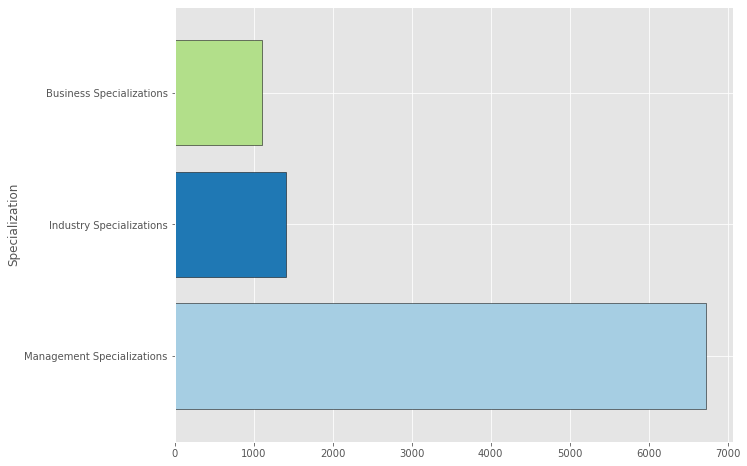

In [54]:
plt.figure(figsize = (10,8))
lead_data.groupby('Specialization')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

- Most of the specialization choosen are Management Specialization.

## Occupation

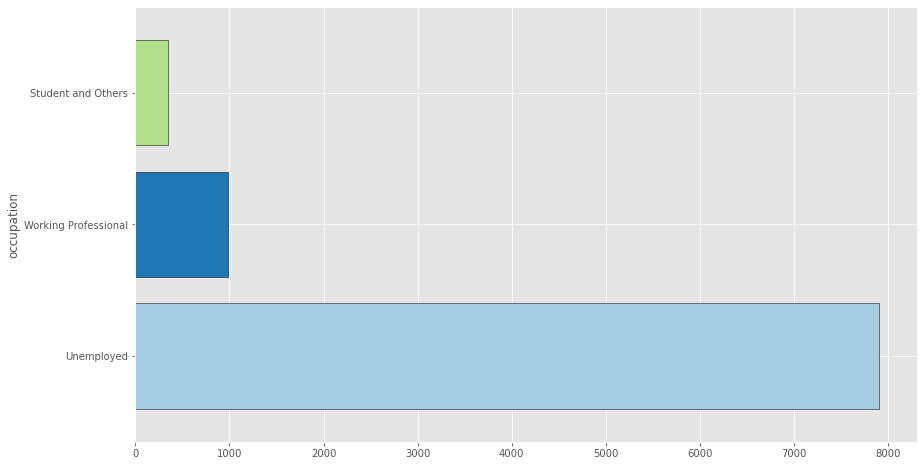

In [55]:
plt.figure(figsize = (14,8))
lead_data.groupby('occupation')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

Unemployed users are the most significant leads

## City

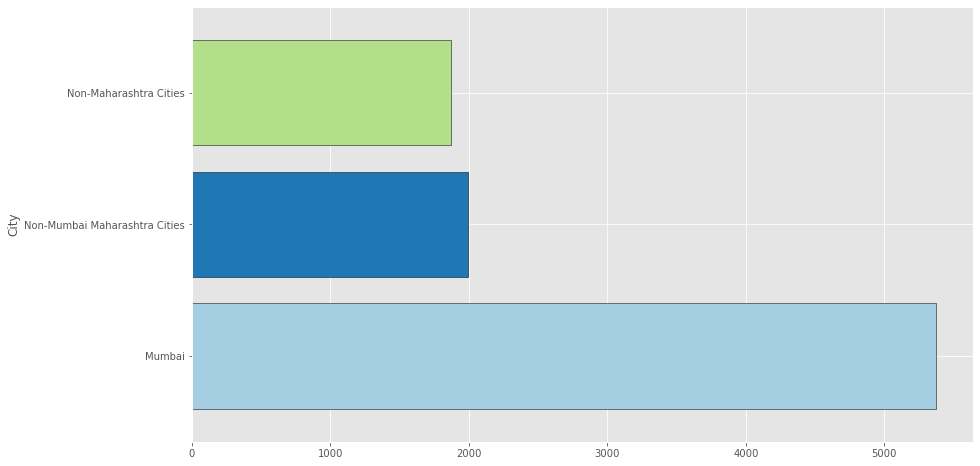

In [56]:
plt.figure(figsize = (14,8))
lead_data.groupby('City')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

- Mumbai in particular and Maharashtra in general dominates the lead.
- This may be due to the fact that the courses are based in Mumbai.

### Do Not Email

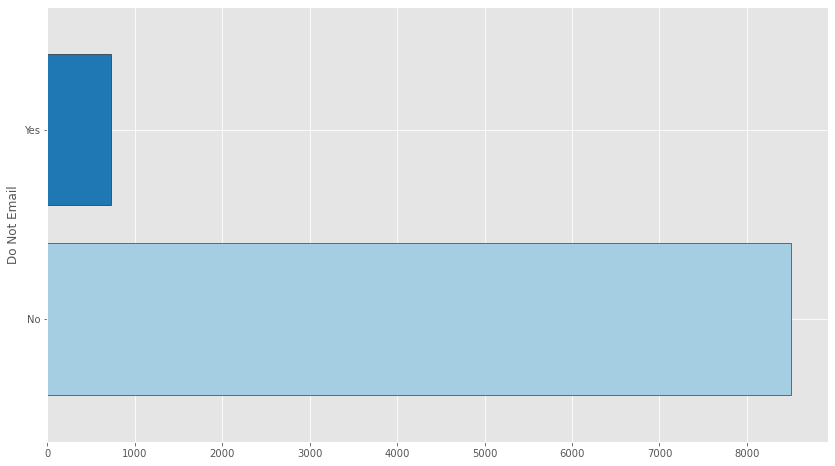

In [57]:
plt.figure(figsize = (14,8))
lead_data.groupby('Do Not Email')['Lead_number'].count().sort_values(ascending = False).plot(kind='barh',width = 0.8,
                                                                                           edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead_data))))

plt.show()

# Data Preparation

## Converting Binary(Yes/No) to 0/1

In [58]:
# determine unique values
for k,v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead_number = 9240
Lead_origin = 3
Lead_source = 6
Do Not Email = 2
Specialization = 3
occupation = 3
City = 3
A free copy of Mastering The Interview = 2


It has been observed that there are two binary columns as 'Do Not Email','A free copy of Mastering The Interview' 

In [59]:
bin_list =['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1 , "No": 0})

# Applying the function to the housing list
lead_data[bin_list] = lead_data[bin_list].apply(binary_map)

# Checking the operation was success

lead_data.head()

Lead_number              Lead_origin     Lead_source  Do Not Email  \
0      660737                      API      Olark Chat             0   
1      660728                      API  Organic Search             0   
2      660727  Landing Page Submission  Direct Traffic             0   
3      660719  Landing Page Submission  Direct Traffic             0   
4      660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Time_on_website  Page_Views_Visit  \
0          0            0                0               0.0   
1          0            5              674               2.5   
2          1            2             1532               2.0   
3          0            1              305               1.0   
4          1            2             1428               1.0   

               Specialization          occupation  \
0  Management Specializations          Unemployed   
1  Management Specializations          Unemployed   
2    Business Specializations  Student and Others   
3    Industry Specializations          Unemployed   
4  Management Specializations          Unemployed   

                            City  A free copy of Mastering The Interview  
0  Non-Mumbai Maharashtra Cities                                       0  
1                         Mumbai                                       0  
2                         Mumbai                                       1  
3                         Mumbai                                       0  
4                         Mumbai                                       0

## Creating dummy variable for categorical columns

Categorical columns are: Lead_origin, Lead_source,Specialization,occupation,City

In [60]:
# Creating dummy variable for the categorical variables and dropping the first one.

## Creating dummy variables
dummy_1 = pd.get_dummies(lead_data[['Lead_origin', 'Lead_source', 'Specialization', 'occupation', 'City']], drop_first = True)

## Adding the results to the master dataframe
lead_data = pd.concat([lead_data,dummy_1], axis = 1)

In [61]:
## Dropping the columns for which dummies have been created
lead_data.drop(['Lead_origin', 'Lead_source', 'Specialization', 'occupation', 'City'], axis = 1, inplace = True)
lead_data.head()

Lead_number  Do Not Email  Converted  TotalVisits  Time_on_website  \
0      660737             0          0            0                0   
1      660728             0          0            5              674   
2      660727             0          1            2             1532   
3      660719             0          0            1              305   
4      660681             0          1            2             1428   

   Page_Views_Visit  A free copy of Mastering The Interview  \
0               0.0                                       0   
1               2.5                                       0   
2               2.0                                       1   
3               1.0                                       0   
4               1.0                                       0   

   Lead_origin_Landing Page Submission  Lead_origin_Lead Add Form and others  \
0                                    0                                     0   
1                                    0                                     0   
2                                    1                                     0   
3                                    1                                     0   
4                                    1                                     0   

   Lead_source_Google  Lead_source_Olark Chat  Lead_source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead_source_Other Social Sites  Lead_source_Reference  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   Specialization_Industry Specializations  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   Specialization_Management Specializations  occupation_Unemployed  \
0                                          1                      1   
1                                          1                      1   
2                                          0                      0   
3                                          0                      1   
4                                          1                      1   

   occupation_Working Professional  City_Non-Maharashtra Cities  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   City_Non-Mumbai Maharashtra Cities  
0                                   1  
1                                   0  
2                                   0  
3                                   0  
4                                   0

### Outliers Treatment

In [62]:
num_cols = lead_data[['TotalVisits','Time_on_website','Page_Views_Visit']]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_cols.describe(percentiles=[.25,.5,.75,.90,.95,.99])

TotalVisits  Time_on_website  Page_Views_Visit
count  9240.000000      9240.000000       9240.000000
mean      3.438636       487.698268          2.357440
std       4.819024       548.021466          2.145781
min       0.000000         0.000000          0.000000
25%       1.000000        12.000000          1.000000
50%       3.000000       248.000000          2.000000
75%       5.000000       936.000000          3.000000
90%       7.000000      1380.000000          5.000000
95%      10.000000      1562.000000          6.000000
99%      17.000000      1840.610000          9.000000
max     251.000000      2272.000000         55.000000

In [63]:
# capping at 99 percentile
lead_data.TotalVisits.loc[lead_data.TotalVisits >= lead_data.TotalVisits.quantile(0.99)] = lead_data.TotalVisits.quantile(0.99)
lead_data.Page_Views_Visit.loc[lead_data.Page_Views_Visit >= lead_data.Page_Views_Visit.quantile(0.99)] = lead_data.Page_Views_Visit.quantile(0.99)

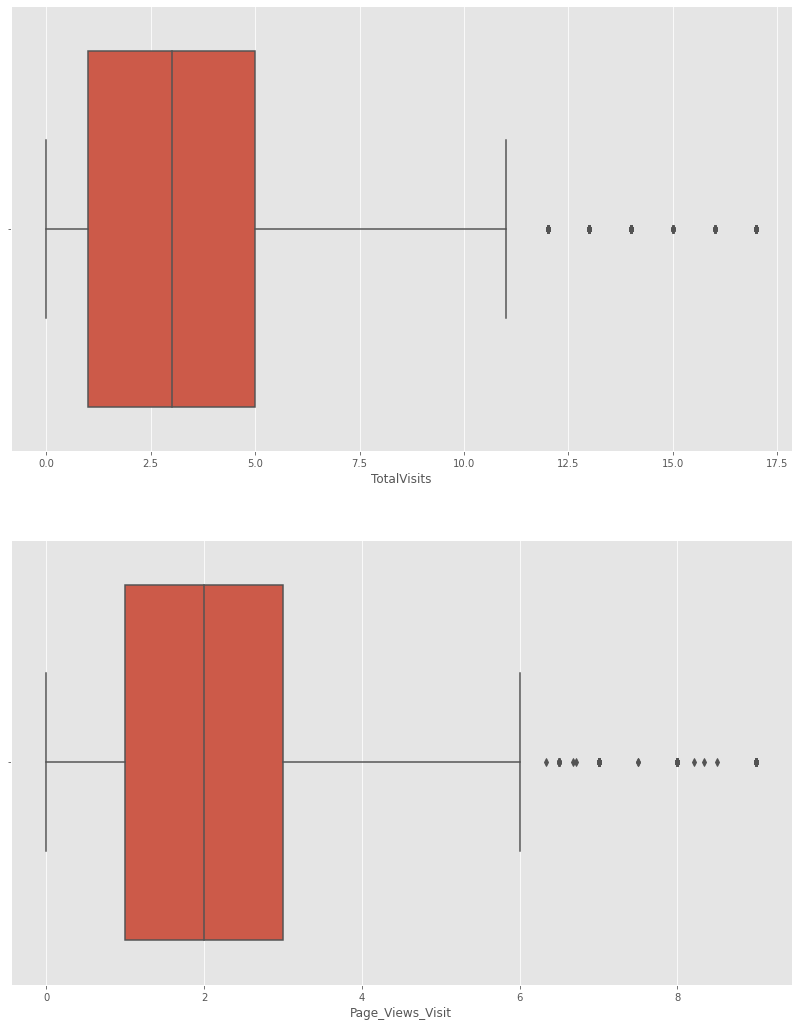

In [64]:
plt.figure(figsize = (14,18))

plt.subplot(2,1,1)
sns.boxplot(lead_data.TotalVisits)

plt.subplot(2,1,2)
sns.boxplot(lead_data.Page_Views_Visit)
plt.show()

It has been observed that ,we are able to significantly reduce the number of outliers by capping.

## Test-Train Split

In [65]:
from sklearn.model_selection import train_test_split 

In [66]:
# Putting feature variable to X
X= lead_data.drop(['Lead_number','Converted'], axis = 1)
X.head()

Do Not Email  TotalVisits  Time_on_website  Page_Views_Visit  \
0             0            0                0               0.0   
1             0            5              674               2.5   
2             0            2             1532               2.0   
3             0            1              305               1.0   
4             0            2             1428               1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead_origin_Landing Page Submission  Lead_origin_Lead Add Form and others  \
0                                    0                                     0   
1                                    0                                     0   
2                                    1                                     0   
3                                    1                                     0   
4                                    1                                     0   

   Lead_source_Google  Lead_source_Olark Chat  Lead_source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead_source_Other Social Sites  Lead_source_Reference  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   Specialization_Industry Specializations  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   Specialization_Management Specializations  occupation_Unemployed  \
0                                          1                      1   
1                                          1                      1   
2                                          0                      0   
3                                          0                      1   
4                                          1                      1   

   occupation_Working Professional  City_Non-Maharashtra Cities  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   City_Non-Mumbai Maharashtra Cities  
0                                   1  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [67]:
# Putting response/target variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling

In [69]:
# import MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Time_on_website','Page_Views_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time_on_website','Page_Views_Visit']])

X_train.head()

Do Not Email  TotalVisits  Time_on_website  Page_Views_Visit  \
1871             0     0.000000         0.000000          0.000000   
6795             0     0.235294         0.214349          0.147778   
3516             0     0.294118         0.046655          0.277778   
8105             0     0.294118         0.541373          0.555556   
3934             0     0.000000         0.000000          0.000000   

      A free copy of Mastering The Interview  \
1871                                       0   
6795                                       1   
3516                                       0   
8105                                       0   
3934                                       0   

      Lead_origin_Landing Page Submission  \
1871                                    0   
6795                                    1   
3516                                    0   
8105                                    1   
3934                                    0   

      Lead_origin_Lead Add Form and others  Lead_source_Google  \
1871                                     0                   0   
6795                                     0                   0   
3516                                     0                   0   
8105                                     0                   1   
3934                                     0                   0   

      Lead_source_Olark Chat  Lead_source_Organic Search  \
1871                       1                           0   
6795                       0                           0   
3516                       1                           0   
8105                       0                           0   
3934                       1                           0   

      Lead_source_Other Social Sites  Lead_source_Reference  \
1871                               0                      0   
6795                               0                      0   
3516                               0                      0   
8105                               0                      0   
3934                               0                      0   

      Specialization_Industry Specializations  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        1   
3934                                        0   

      Specialization_Management Specializations  occupation_Unemployed  \
1871                                          1                      1   
6795                                          1                      1   
3516                                          1                      1   
8105                                          0                      1   
3934                                          1                      1   

      occupation_Working Professional  City_Non-Maharashtra Cities  \
1871                                0                            0   
6795                                0                            1   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      City_Non-Mumbai Maharashtra Cities  
1871                                   1  
6795                                   0  
3516                                   0  
8105                                   0  
3934                                   0

In [71]:
# Checking the conversion rate
conversion = (sum(lead_data['Converted'])/len(lead_data['Converted'].index)) * 100
conversion

38.53896103896104

The conversion rate is 38.5%

### Looking at correlations

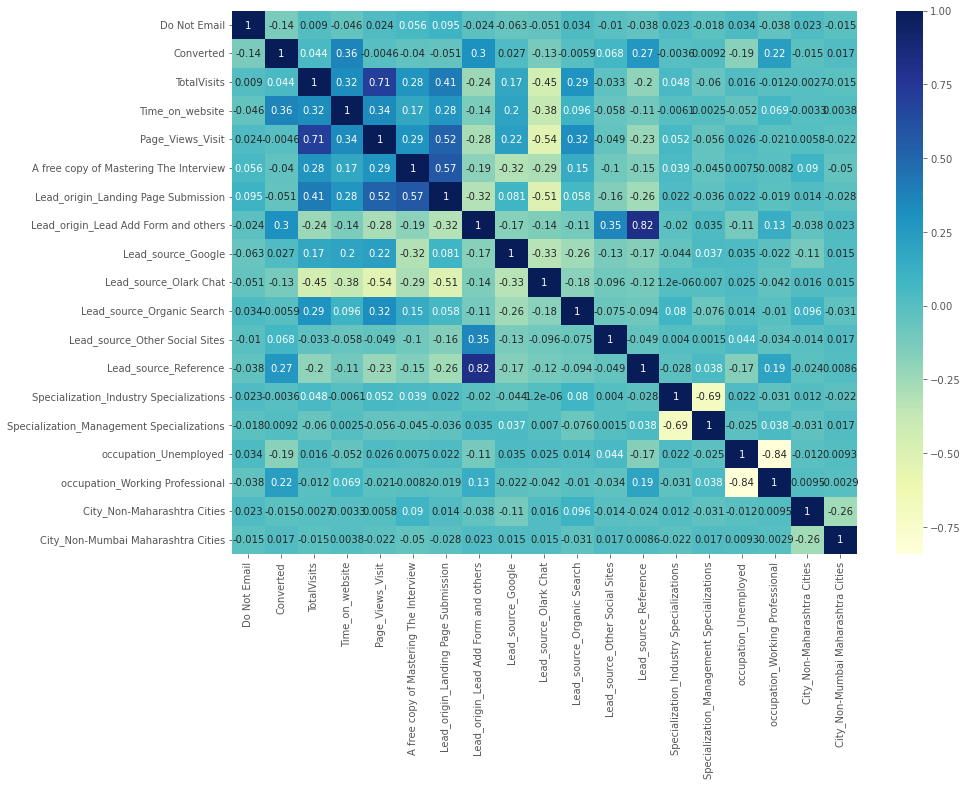

In [72]:
#Let's see the correlation matrix
plt.figure(figsize = (14,10))
sns.heatmap(lead_data.corr(), annot = True, cmap ='YlGnBu')
plt.show()


### Dropping highly correlated dummy variables

In [73]:
X_test.drop(['Lead_origin_Lead Add Form and others','Specialization_Industry Specializations','occupation_Working Professional'], axis = 1, inplace = True)
X_train.drop(['Lead_origin_Lead Add Form and others','Specialization_Industry Specializations','occupation_Working Professional'], axis = 1, inplace = True)

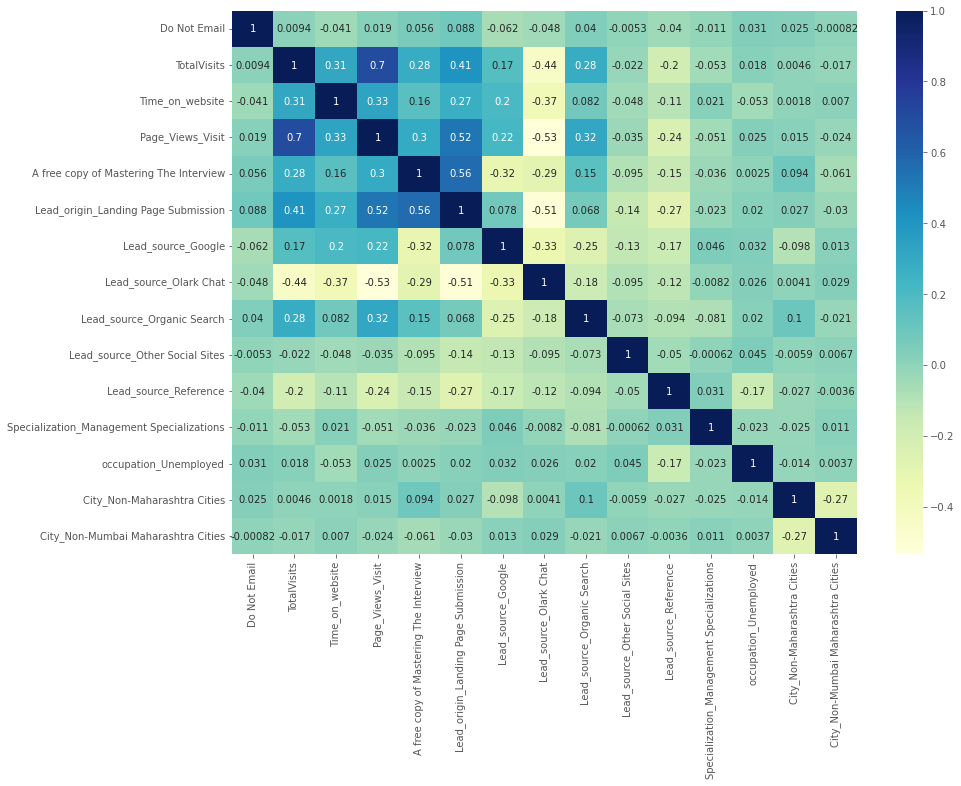

In [74]:
#Let's re-check the correlation matrix
plt.figure(figsize = (14,10))
sns.heatmap(X_train.corr(), annot = True, cmap ='YlGnBu')
plt.show()


# Model Building

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Time_on_website', True, 1),
 ('Page_Views_Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead_origin_Landing Page Submission', True, 1),
 ('Lead_source_Google', True, 1),
 ('Lead_source_Olark Chat', True, 1),
 ('Lead_source_Organic Search', True, 1),
 ('Lead_source_Other Social Sites', True, 1),
 ('Lead_source_Reference', True, 1),
 ('Specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('City_Non-Maharashtra Cities', True, 1),
 ('City_Non-Mumbai Maharashtra Cities', True, 1)]

In [78]:
# Put all the selected columns by RFE in the variable 'col'

col= X_train.columns[rfe.support_]

Let's use these selected variables to create a logistic regression model using statsmodel where we will check the p-values and VIF's.

In [79]:
# Selecting only the columns supported by RFE

X_train = X_train[col]

In [80]:
import statsmodels.api as sm

In [81]:
# Fit a logistic regression model on X_train after adding a constant and checking the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3298.2
Date:                Tue, 12 Jul 2022   Deviance:                       6596.4
Time:                        14:54:25   Pearson chi2:                 6.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0372      0.155     -6.711      0.000      -1.340      -0.734
Do Not Email                                 -1.2146      0.144     -8.419      0.000      -1.497      -0.932
TotalVisits                                   0.7301      0.219      3.341      0.001       0.302       1.158
Time_on_website                               4.3412      0.148     29.288      0.000       4.051       4.632
Page_Views_Visit                             -0.8608      0.222     -3.880      0.000      -1.296      -0.426
A free copy of Mastering The Interview       -0.0165      0.094     -0.176      0.860      -0.201       0.167
Lead_origin_Landing Page Submission          -0.0007      0.092     -0.008      0.994      -0.182       0.180
Lead_source_Google                            0.3619      0.100      3.603      0.000       0.165       0.559
Lead_source_Olark Chat                        0.6623      0.137      4.849      0.000       0.395       0.930
Lead_source_Organic Search                    0.2244      0.116      1.936      0.053      -0.003       0.452
Lead_source_Other Social Sites                1.6355      0.175      9.342      0.000       1.292       1.979
Lead_source_Reference                         3.9420      0.221     17.838      0.000       3.509       4.375
Specialization_Management Specializations    -0.0524      0.069     -0.763      0.446      -0.187       0.082
occupation_Unemployed                        -0.9331      0.086    -10.881      0.000      -1.101      -0.765
City_Non-Maharashtra Cities                   0.0320      0.079      0.405      0.685      -0.123       0.187
City_Non-Mumbai Maharashtra Cities            0.0263      0.076      0.345      0.730      -0.123       0.176
=============================================================================================================
"""

In [82]:
# import 'variance_inflation_factor' 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
3                            Page_Views_Visit  6.03
12                      occupation_Unemployed  5.32
5         Lead_origin_Landing Page Submission  4.56
1                                 TotalVisits  4.13
11  Specialization_Management Specializations  3.28
4      A free copy of Mastering The Interview  2.80
6                          Lead_source_Google  2.72
2                             Time_on_website  2.12
7                      Lead_source_Olark Chat  2.09
8                  Lead_source_Organic Search  1.62
13                City_Non-Maharashtra Cities  1.35
14         City_Non-Mumbai Maharashtra Cities  1.35
10                      Lead_source_Reference  1.24
9              Lead_source_Other Social Sites  1.21
0                                Do Not Email  1.10

In [84]:
X_train.drop('Page_Views_Visit', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3305.8
Date:                Tue, 12 Jul 2022   Deviance:                       6611.7
Time:                        14:54:26   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.1343      0.152     -7.449      0.000      -1.433      -0.836
Do Not Email                                 -1.2017      0.144     -8.335      0.000      -1.484      -0.919
TotalVisits                                   0.3017      0.190      1.588      0.112      -0.071       0.674
Time_on_website                               4.3066      0.148     29.195      0.000       4.017       4.596
A free copy of Mastering The Interview       -0.0082      0.094     -0.088      0.930      -0.192       0.175
Lead_origin_Landing Page Submission          -0.0826      0.090     -0.920      0.358      -0.258       0.093
Lead_source_Google                            0.3270      0.100      3.281      0.001       0.132       0.522
Lead_source_Olark Chat                        0.7431      0.135      5.507      0.000       0.479       1.008
Lead_source_Organic Search                    0.1381      0.113      1.219      0.223      -0.084       0.360
Lead_source_Other Social Sites                1.6320      0.176      9.298      0.000       1.288       1.976
Lead_source_Reference                         4.0188      0.220     18.254      0.000       3.587       4.450
Specialization_Management Specializations    -0.0453      0.069     -0.661      0.509      -0.180       0.089
occupation_Unemployed                        -0.9268      0.086    -10.825      0.000      -1.095      -0.759
City_Non-Maharashtra Cities                   0.0331      0.079      0.420      0.675      -0.121       0.188
City_Non-Mumbai Maharashtra Cities            0.0270      0.076      0.354      0.723      -0.123       0.177
=============================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
11                      occupation_Unemployed  5.28
4         Lead_origin_Landing Page Submission  4.16
10  Specialization_Management Specializations  3.28
1                                 TotalVisits  2.99
3      A free copy of Mastering The Interview  2.79
5                          Lead_source_Google  2.63
2                             Time_on_website  2.11
6                      Lead_source_Olark Chat  2.07
7                  Lead_source_Organic Search  1.51
12                City_Non-Maharashtra Cities  1.35
13         City_Non-Mumbai Maharashtra Cities  1.35
9                       Lead_source_Reference  1.24
8              Lead_source_Other Social Sites  1.20
0                                Do Not Email  1.10

In [87]:
X_train.drop('occupation_Unemployed', axis = 1, inplace = True)

In [88]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3364.7
Date:                Tue, 12 Jul 2022   Deviance:                       6729.3
Time:                        14:54:26   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.9527      0.132    -14.766      0.000      -2.212      -1.694
Do Not Email                                 -1.2146      0.143     -8.477      0.000      -1.495      -0.934
TotalVisits                                   0.3109      0.188      1.658      0.097      -0.057       0.678
Time_on_website                               4.3517      0.147     29.677      0.000       4.064       4.639
A free copy of Mastering The Interview       -0.0005      0.093     -0.005      0.996      -0.182       0.181
Lead_origin_Landing Page Submission          -0.0727      0.089     -0.818      0.413      -0.247       0.101
Lead_source_Google                            0.3074      0.099      3.121      0.002       0.114       0.501
Lead_source_Olark Chat                        0.7552      0.134      5.653      0.000       0.493       1.017
Lead_source_Organic Search                    0.1191      0.112      1.065      0.287      -0.100       0.338
Lead_source_Other Social Sites                1.5459      0.174      8.905      0.000       1.206       1.886
Lead_source_Reference                         4.1791      0.218     19.163      0.000       3.752       4.607
Specialization_Management Specializations    -0.0307      0.068     -0.453      0.651      -0.164       0.102
City_Non-Maharashtra Cities                   0.0452      0.078      0.580      0.562      -0.108       0.198
City_Non-Mumbai Maharashtra Cities            0.0332      0.076      0.440      0.660      -0.115       0.181
=============================================================================================================
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
4         Lead_origin_Landing Page Submission  3.90
10  Specialization_Management Specializations  3.14
1                                 TotalVisits  2.96
3      A free copy of Mastering The Interview  2.72
5                          Lead_source_Google  2.26
2                             Time_on_website  2.10
6                      Lead_source_Olark Chat  1.51
7                  Lead_source_Organic Search  1.43
11                City_Non-Maharashtra Cities  1.35
12         City_Non-Mumbai Maharashtra Cities  1.34
9                       Lead_source_Reference  1.17
8              Lead_source_Other Social Sites  1.11
0                                Do Not Email  1.09

In [90]:
X_train.drop('A free copy of Mastering The Interview', axis = 1, inplace = True)

In [91]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3364.7
Date:                Tue, 12 Jul 2022   Deviance:                       6729.3
Time:                        14:54:26   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.9529      0.126    -15.488      0.000      -2.200      -1.706
Do Not Email                                 -1.2146      0.143     -8.480      0.000      -1.495      -0.934
TotalVisits                                   0.3108      0.187      1.666      0.096      -0.055       0.677
Time_on_website                               4.3517      0.147     29.682      0.000       4.064       4.639
Lead_origin_Landing Page Submission          -0.0728      0.084     -0.863      0.388      -0.238       0.092
Lead_source_Google                            0.3077      0.084      3.660      0.000       0.143       0.472
Lead_source_Olark Chat                        0.7553      0.129      5.874      0.000       0.503       1.007
Lead_source_Organic Search                    0.1192      0.110      1.079      0.280      -0.097       0.336
Lead_source_Other Social Sites                1.5461      0.169      9.142      0.000       1.215       1.878
Lead_source_Reference                         4.1793      0.215     19.462      0.000       3.758       4.600
Specialization_Management Specializations    -0.0307      0.068     -0.453      0.651      -0.164       0.102
City_Non-Maharashtra Cities                   0.0452      0.078      0.581      0.561      -0.107       0.198
City_Non-Mumbai Maharashtra Cities            0.0333      0.076      0.441      0.660      -0.115       0.181
=============================================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
9   Specialization_Management Specializations  3.08
1                                 TotalVisits  2.88
3         Lead_origin_Landing Page Submission  2.80
2                             Time_on_website  2.08
4                          Lead_source_Google  1.83
5                      Lead_source_Olark Chat  1.51
6                  Lead_source_Organic Search  1.42
11         City_Non-Mumbai Maharashtra Cities  1.34
10                City_Non-Maharashtra Cities  1.33
8                       Lead_source_Reference  1.17
7              Lead_source_Other Social Sites  1.10
0                                Do Not Email  1.09

In [93]:
X_train.drop('Specialization_Management Specializations', axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3364.8
Date:                Tue, 12 Jul 2022   Deviance:                       6729.5
Time:                        14:54:26   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.9766      0.115    -17.221      0.000      -2.202      -1.752
Do Not Email                           -1.2139      0.143     -8.477      0.000      -1.495      -0.933
TotalVisits                             0.3144      0.186      1.687      0.092      -0.051       0.680
Time_on_website                         4.3500      0.147     29.683      0.000       4.063       4.637
Lead_origin_Landing Page Submission    -0.0721      0.084     -0.856      0.392      -0.237       0.093
Lead_source_Google                      0.3073      0.084      3.656      0.000       0.143       0.472
Lead_source_Olark Chat                  0.7568      0.129      5.887      0.000       0.505       1.009
Lead_source_Organic Search              0.1221      0.110      1.108      0.268      -0.094       0.338
Lead_source_Other Social Sites          1.5468      0.169      9.147      0.000       1.215       1.878
Lead_source_Reference                   4.1793      0.215     19.462      0.000       3.758       4.600
City_Non-Maharashtra Cities             0.0457      0.078      0.587      0.557      -0.107       0.198
City_Non-Mumbai Maharashtra Cities      0.0330      0.076      0.437      0.662      -0.115       0.181
=======================================================================================================
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                           TotalVisits  2.87
3   Lead_origin_Landing Page Submission  2.49
2                       Time_on_website  2.04
4                    Lead_source_Google  1.64
6            Lead_source_Organic Search  1.40
9           City_Non-Maharashtra Cities  1.33
10   City_Non-Mumbai Maharashtra Cities  1.33
5                Lead_source_Olark Chat  1.15
0                          Do Not Email  1.09
7        Lead_source_Other Social Sites  1.05
8                 Lead_source_Reference  1.04

In [96]:
X_train.drop('Lead_origin_Landing Page Submission', axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3365.1
Date:                Tue, 12 Jul 2022   Deviance:                       6730.3
Time:                        14:54:27   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.0382      0.090    -22.744      0.000      -2.214      -1.863
Do Not Email                          -1.2170      0.143     -8.501      0.000      -1.498      -0.936
TotalVisits                            0.2873      0.184      1.563      0.118      -0.073       0.648
Time_on_website                        4.3477      0.146     29.678      0.000       4.061       4.635
Lead_source_Google                     0.3337      0.078      4.272      0.000       0.181       0.487
Lead_source_Olark Chat                 0.8192      0.106      7.723      0.000       0.611       1.027
Lead_source_Organic Search             0.1499      0.105      1.424      0.154      -0.056       0.356
Lead_source_Other Social Sites         1.6030      0.156     10.278      0.000       1.297       1.909
Lead_source_Reference                  4.2414      0.202     20.979      0.000       3.845       4.638
City_Non-Maharashtra Cities            0.0453      0.078      0.582      0.561      -0.107       0.198
City_Non-Mumbai Maharashtra Cities     0.0336      0.076      0.445      0.657      -0.114       0.182
======================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                         TotalVisits  2.29
2                     Time_on_website  1.90
3                  Lead_source_Google  1.64
5          Lead_source_Organic Search  1.40
9  City_Non-Mumbai Maharashtra Cities  1.30
8         City_Non-Maharashtra Cities  1.28
4              Lead_source_Olark Chat  1.14
0                        Do Not Email  1.06
6      Lead_source_Other Social Sites  1.04
7               Lead_source_Reference  1.03

In [99]:
X_train.drop('City_Non-Mumbai Maharashtra Cities', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3365.2
Date:                Tue, 12 Jul 2022   Deviance:                       6730.5
Time:                        14:54:27   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.0295      0.087    -23.219      0.000      -2.201      -1.858
Do Not Email                      -1.2166      0.143     -8.500      0.000      -1.497      -0.936
TotalVisits                        0.2864      0.184      1.559      0.119      -0.074       0.647
Time_on_website                    4.3494      0.146     29.698      0.000       4.062       4.636
Lead_source_Google                 0.3334      0.078      4.268      0.000       0.180       0.487
Lead_source_Olark Chat             0.8205      0.106      7.739      0.000       0.613       1.028
Lead_source_Organic Search         0.1506      0.105      1.431      0.153      -0.056       0.357
Lead_source_Other Social Sites     1.6041      0.156     10.286      0.000       1.298       1.910
Lead_source_Reference              4.2415      0.202     20.979      0.000       3.845       4.638
City_Non-Maharashtra Cities        0.0359      0.075      0.480      0.631      -0.111       0.183
==================================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                     TotalVisits  2.26
2                 Time_on_website  1.87
3              Lead_source_Google  1.61
5      Lead_source_Organic Search  1.39
8     City_Non-Maharashtra Cities  1.22
0                    Do Not Email  1.06
4          Lead_source_Olark Chat  1.05
6  Lead_source_Other Social Sites  1.03
7           Lead_source_Reference  1.02

In [102]:
X_train.drop('Lead_source_Organic Search', axis = 1, inplace = True)

In [103]:
# Refit the model with the new set of features

logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3366.3
Date:                Tue, 12 Jul 2022   Deviance:                       6732.5
Time:                        14:54:27   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9946      0.084    -23.857      0.000      -2.159      -1.831
Do Not Email                      -1.2190      0.143     -8.517      0.000      -1.499      -0.938
TotalVisits                        0.3353      0.180      1.859      0.063      -0.018       0.689
Time_on_website                    4.3437      0.146     29.679      0.000       4.057       4.631
Lead_source_Google                 0.2873      0.071      4.050      0.000       0.148       0.426
Lead_source_Olark Chat             0.7832      0.103      7.639      0.000       0.582       0.984
Lead_source_Other Social Sites     1.5607      0.153     10.208      0.000       1.261       1.860
Lead_source_Reference              4.2051      0.200     20.979      0.000       3.812       4.598
City_Non-Maharashtra Cities        0.0430      0.075      0.575      0.565      -0.104       0.189
==================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                     TotalVisits  1.92
2                 Time_on_website  1.86
3              Lead_source_Google  1.46
7     City_Non-Maharashtra Cities  1.20
0                    Do Not Email  1.06
4          Lead_source_Olark Chat  1.05
5  Lead_source_Other Social Sites  1.02
6           Lead_source_Reference  1.02

In [105]:
X_train.drop('City_Non-Maharashtra Cities', axis = 1, inplace = True)

In [106]:
# Refit the model with the new set of features

logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3366.4
Date:                Tue, 12 Jul 2022   Deviance:                       6732.8
Time:                        14:54:27   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9830      0.081    -24.461      0.000      -2.142      -1.824
Do Not Email                      -1.2170      0.143     -8.509      0.000      -1.497      -0.937
TotalVisits                        0.3335      0.180      1.850      0.064      -0.020       0.687
Time_on_website                    4.3442      0.146     29.681      0.000       4.057       4.631
Lead_source_Google                 0.2821      0.070      4.009      0.000       0.144       0.420
Lead_source_Olark Chat             0.7805      0.102      7.623      0.000       0.580       0.981
Lead_source_Other Social Sites     1.5573      0.153     10.195      0.000       1.258       1.857
Lead_source_Reference              4.2005      0.200     20.974      0.000       3.808       4.593
==================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                     TotalVisits  1.87
2                 Time_on_website  1.83
3              Lead_source_Google  1.46
0                    Do Not Email  1.05
5  Lead_source_Other Social Sites  1.02
4          Lead_source_Olark Chat  1.01
6           Lead_source_Reference  1.01

In [108]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [109]:
# Refit the model with the new set of features

logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6461
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3368.1
Date:                Tue, 12 Jul 2022   Deviance:                       6736.2
Time:                        14:54:27   Pearson chi2:                 6.63e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8997      0.067    -28.406      0.000      -2.031      -1.769
Do Not Email                      -1.2208      0.143     -8.539      0.000      -1.501      -0.941
Time_on_website                    4.3700      0.146     29.965      0.000       4.084       4.656
Lead_source_Google                 0.2733      0.070      3.892      0.000       0.136       0.411
Lead_source_Olark Chat             0.7046      0.093      7.548      0.000       0.522       0.888
Lead_source_Other Social Sites     1.5262      0.151     10.090      0.000       1.230       1.823
Lead_source_Reference              4.1214      0.195     21.090      0.000       3.738       4.504
==================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns 
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =vif.sort_values(by="VIF", ascending = False)
vif

Features   VIF
1                 Time_on_website  1.38
2              Lead_source_Google  1.35
0                    Do Not Email  1.03
3          Lead_source_Olark Chat  1.01
4  Lead_source_Other Social Sites  1.01
5           Lead_source_Reference  1.01

All the P-values and VIF of all the variables are descent enough.

### Model Evaluation

Now let's proceed and make predictions with these final set of features.

In [111]:
X_train.columns

Index(['Do Not Email', 'Time_on_website', 'Lead_source_Google',
       'Lead_source_Olark Chat', 'Lead_source_Other Social Sites',
       'Lead_source_Reference'],
      dtype='object')

In [112]:
# Use 'predict' to predict the probabilities on the train set.

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.232345
6795    0.276275
3516    0.270669
8105    0.676853
3934    0.232345
4844    0.728940
3297    0.149792
8071    0.946724
987     0.767475
7423    0.798966
dtype: float64

In [113]:
# Creating a dataframe with the actual conversion flag and the probabilities predicted by the model 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
1871          0         0.232345
6795          0         0.276275
3516          0         0.270669
8105          0         0.676853
3934          0         0.232345

## Creating new column "Predicted" with 1 if Paid_Prob > 0.5 else 0

In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
1871          0         0.232345          0
6795          0         0.276275          0
3516          0         0.270669          0
8105          0         0.676853          1
3934          0         0.232345          0

Now we have the probablities and the conversion predictions also.Now we can evaluate the model.

In [115]:
# Create Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3471  531]
 [1045 1421]]


In [116]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.756338899196042


In [117]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [118]:
# Calculate the sensitivity
TP/(TP+FN)

0.5762368207623683

In [119]:
# Calculate the specificity
TN/(TN+FP)

0.8673163418290855

### Finding the optimal cut off 

Now 0.5 was just arbitrary to loosely check the model performance.But in order to get good results, we need to optimise the threshold. S, now plot an ROC curve to see what AUC we get

In [120]:
# ROC function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

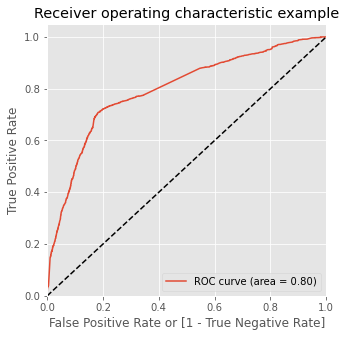

In [122]:
# call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of ROC is 0.80 which is quite good.It seems that we have a good model.

Let's also check the sensitivity and specificity tradeoff to find the optimal cut off point. 

In [123]:
# Let's create columns with different probability cut offs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()    



Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
1871          0         0.232345          0    1    1    1    0    0    0   
6795          0         0.276275          0    1    1    1    0    0    0   
3516          0         0.270669          0    1    1    1    0    0    0   
8105          0         0.676853          1    1    1    1    1    1    1   
3934          0         0.232345          0    1    1    1    0    0    0   

      0.6  0.7  0.8  0.9  
1871    0    0    0    0  
6795    0    0    0    0  
3516    0    0    0    0  
8105    1    0    0    0  
3934    0    0    0    0

In [124]:
# Let's create a dataframe to check the other metrics(accuracy, sensitivity,and specificity) at different values of probability cutoffs.

cutoff_df = pd.DataFrame(columns =['prob','accuracy','sensi','speci'])

# creating confusion matrix
#TP = confusion[1,1] # true positive
#TN = confusion[0,0] # true negative
#FP = confusion[0,1] # false positive
#FN = confusion[1,0] # false negative

num =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.426252  0.991484  0.077961
0.2   0.2  0.561070  0.910381  0.345827
0.3   0.3  0.760204  0.733982  0.776362
0.4   0.4  0.775356  0.686131  0.830335
0.5   0.5  0.756339  0.576237  0.867316
0.6   0.6  0.739177  0.470803  0.904548
0.7   0.7  0.713976  0.343877  0.942029
0.8   0.8  0.682127  0.212084  0.971764
0.9   0.9  0.668522  0.147607  0.989505


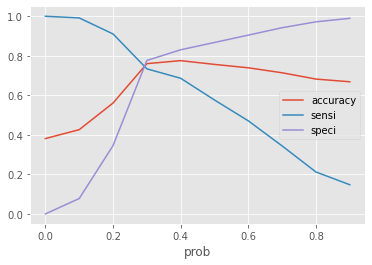

In [125]:
# Let's plot it as well 

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

We can see that around 0.3, we get our optimal cut off value.


In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
1871          0         0.232345          0    1    1    1    0    0    0   
6795          0         0.276275          0    1    1    1    0    0    0   
3516          0         0.270669          0    1    1    1    0    0    0   
8105          0         0.676853          1    1    1    1    1    1    1   
3934          0         0.232345          0    1    1    1    0    0    0   

      0.6  0.7  0.8  0.9  final_predicted  
1871    0    0    0    0                0  
6795    0    0    0    0                0  
3516    0    0    0    0                0  
8105    1    0    0    0                1  
3934    0    0    0    0                0

In [127]:
# Let's check the accuracy now

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted))

0.7602040816326531


In [128]:
# let's create the confusion matrix once again.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion2)


[[3107  895]
 [ 656 1810]]


In [129]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [130]:
# Calculate the sensitivity
TP/(TP+FN)

0.7339821573398215

In [131]:
# Calculate the specificity
TN/(TN+FP)

0.7763618190904548

 This cutoff point seems good to go with.

## Making predictions on the Test set

In [132]:
col=X_train.columns
col

Index(['Do Not Email', 'Time_on_website', 'Lead_source_Google',
       'Lead_source_Olark Chat', 'Lead_source_Other Social Sites',
       'Lead_source_Reference'],
      dtype='object')

In [133]:
X_test=X_test[col]
X_test.columns

Index(['Do Not Email', 'Time_on_website', 'Lead_source_Google',
       'Lead_source_Olark Chat', 'Lead_source_Other Social Sites',
       'Lead_source_Reference'],
      dtype='object')

In [134]:
X_test.shape

(2772, 6)

In [135]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm

const  Do Not Email  Time_on_website  Lead_source_Google  \
4269    1.0             0             1011                   0   
2376    1.0             0                0                   0   
7766    1.0             0               59                   1   
9199    1.0             0                0                   0   
4359    1.0             0                0                   0   
...     ...           ...              ...                 ...   
8649    1.0             0              290                   0   
2152    1.0             0                0                   1   
7101    1.0             0                0                   0   
5331    1.0             1             1608                   0   
2960    1.0             0                0                   0   

      Lead_source_Olark Chat  Lead_source_Other Social Sites  \
4269                       0                               0   
2376                       0                               0   
7766                       0                               0   
9199                       1                               0   
4359                       0                               0   
...                      ...                             ...   
8649                       0                               0   
2152                       0                               0   
7101                       1                               0   
5331                       0                               0   
2960                       0                               0   

      Lead_source_Reference  
4269                      0  
2376                      1  
7766                      0  
9199                      0  
4359                      1  
...                     ...  
8649                      0  
2152                      0  
7101                      0  
5331                      0  
2960                      1  

[2772 rows x 7 columns]

In [136]:
# Prediction on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)


In [137]:
y_test_pred[:10]

4269    1.000000
2376    0.902175
7766    1.000000
9199    0.232345
4359    0.902175
9186    1.000000
1631    1.000000
8963    1.000000
8007    1.000000
5324    1.000000
dtype: float64

In [138]:
# Converting y_pred to a dataframe

y_pred1 = pd.DataFrame(y_test_pred)

y_pred1.head()

0
4269  1.000000
2376  0.902175
7766  1.000000
9199  0.232345
4359  0.902175

In [139]:
# Converting 'y_test' to dataframe

y_test_df = pd.DataFrame(y_test)

In [140]:
# remove index from both dataframe to append them side by side
y_pred1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [141]:
# Append both the dataframe

y_pred_final = pd.concat([y_test_df,y_pred1],axis = 1)

y_pred_final.head()

Converted         0
0          1  1.000000
1          1  0.902175
2          1  1.000000
3          0  0.232345
4          1  0.902175

In [142]:
# rename the column
y_pred_final = y_pred_final.rename(columns = {0: 'Conversion_Prob'})

y_pred_final.head()

Converted  Conversion_Prob
0          1         1.000000
1          1         0.902175
2          1         1.000000
3          0         0.232345
4          1         0.902175

In [143]:
# make prediction on the test set using 0.3 as cut off
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [144]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         1.000000                1
1          1         0.902175                1
2          1         1.000000                1
3          0         0.232345                0
4          1         0.902175                1

In [145]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted))

0.4769119769119769


In [146]:
# let's create the confusion matrix.

confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
print(confusion2)

[[ 362 1315]
 [ 135  960]]


In [147]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [148]:
# Calculate the sensitivity
TP/float(TP+FN)

0.8767123287671232

In [149]:
# Calculate the specificity
TN/float(TN+FP)

0.21586165772212285

## Precision-Recall View

Let's now build the training model using Precision-Recall View

In [150]:
# Checking the Confusion Matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3471  531]
 [1045 1421]]


 Precision:
 
 TP/(TP+FP)

In [151]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7279713114754098

Recall:
    
TP/(TP+FN)

In [152]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.5762368207623683

## Precision and Recall trade off

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     0
 79      1
 8039    0
 6936    0
 5640    0
 Name: Predicted, Length: 6468, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

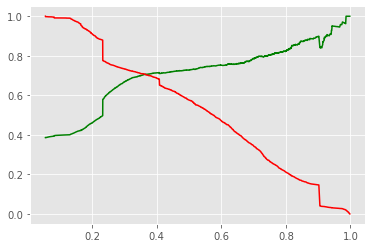

In [156]:
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
1871          0         0.232345          0    1    1    1    0    0    0   
6795          0         0.276275          0    1    1    1    0    0    0   
3516          0         0.270669          0    1    1    1    0    0    0   
8105          0         0.676853          1    1    1    1    1    1    1   
3934          0         0.232345          0    1    1    1    0    0    0   

      0.6  0.7  0.8  0.9  final_predicted  
1871    0    0    0    0                0  
6795    0    0    0    0                0  
3516    0    0    0    0                0  
8105    1    0    0    0                1  
3934    0    0    0    0                0

In [158]:
# let's check the accuracy now

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7755102040816326


In [159]:
# let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion2)

[[3284  718]
 [ 734 1732]]


In [160]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [161]:
# Calculate Precision:

TP/(TP+FP)

0.7069387755102041

In [162]:
# Calculate Recall:

TP/(TP+FN)

0.7023519870235199

## Making Final Predictions on the test set as well

In [163]:
# Prediction on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

4269    1.000000
2376    0.902175
7766    1.000000
9199    0.232345
4359    0.902175
9186    1.000000
1631    1.000000
8963    1.000000
8007    1.000000
5324    1.000000
dtype: float64

In [165]:
# Converting y_pred to a dataframe

y_pred1 = pd.DataFrame(y_test_pred)

y_pred1.head()

0
4269  1.000000
2376  0.902175
7766  1.000000
9199  0.232345
4359  0.902175

In [166]:
# Converting 'y_test' to dataframe

y_test_df = pd.DataFrame(y_test)

In [167]:
# remove index from both dataframe to append them side by side
y_pred1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [168]:
# Append both the dataframe

y_pred_final = pd.concat([y_test_df,y_pred1],axis = 1)

y_pred_final.head()

Converted         0
0          1  1.000000
1          1  0.902175
2          1  1.000000
3          0  0.232345
4          1  0.902175

In [169]:
# rename the column
y_pred_final = y_pred_final.rename(columns = {0: 'Conversion_Prob'})

y_pred_final.head()

Converted  Conversion_Prob
0          1         1.000000
1          1         0.902175
2          1         1.000000
3          0         0.232345
4          1         0.902175

In [170]:
# make prediction on the test set using 0.3 as cut off
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [171]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         1.000000                1
1          1         0.902175                1
2          1         1.000000                1
3          0         0.232345                0
4          1         0.902175                1

In [172]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted))

0.4769119769119769


In [173]:
# let's create the confusion matrix.

confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
print(confusion2)

[[ 362 1315]
 [ 135  960]]


In [174]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [175]:
# Calculate Precision:

TP/(TP+FP)

0.421978021978022

In [176]:
# Calculate Recall:

TP/(TP+FN)

0.8767123287671232